# Introduction to Matplotlib

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

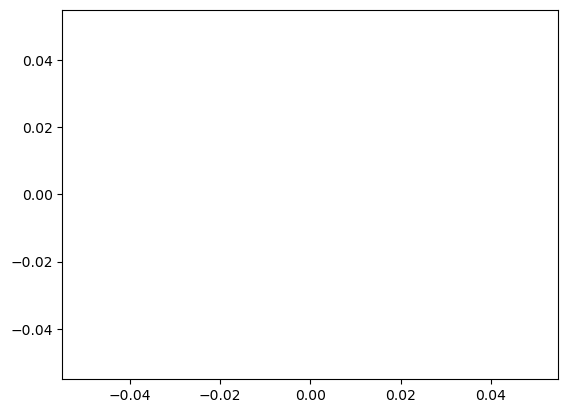

In [8]:
plt.plot();

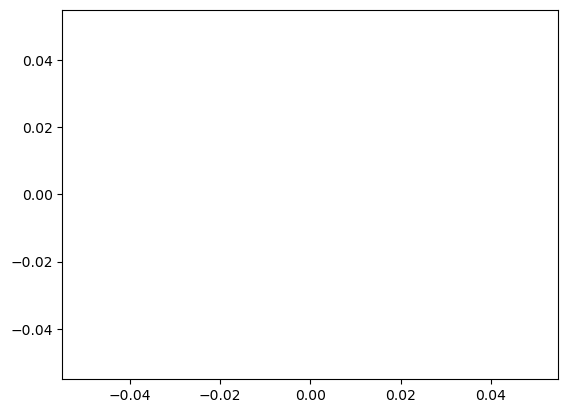

In [10]:
plt.plot()
plt.show()

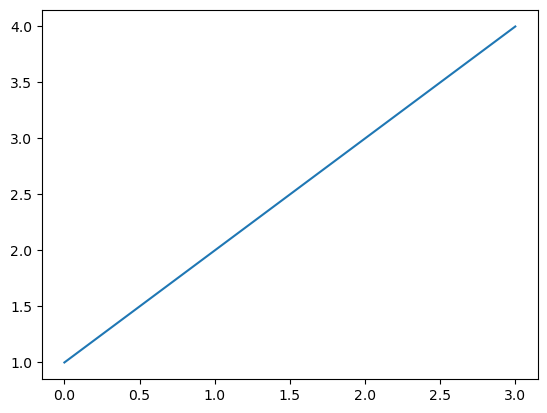

In [12]:
plt.plot([1,2,3,4]);

In [14]:
x = [1,2,3,4]
y = [11,22,33,44]

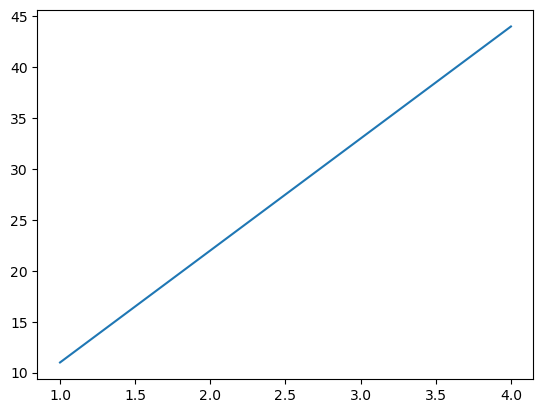

In [17]:
plt.plot(x,y); # stateless plotting 

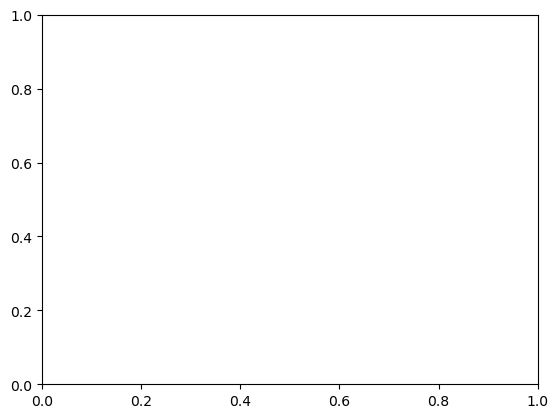

In [20]:
# 1st method 
fig = plt.figure() #creates a figure
ax = fig.add_subplot()
plt.show()

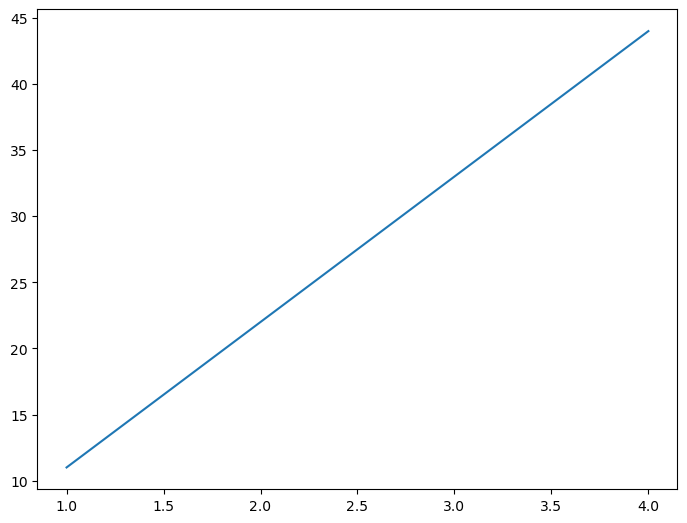

In [22]:
# 2nd method
fig = plt.figure() # creates a figure 
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y)
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

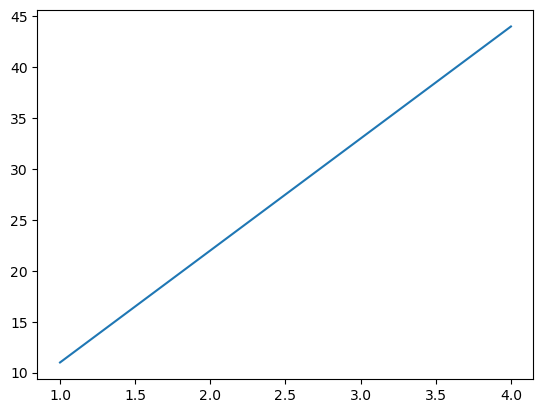

In [26]:
# 3rd method  (recommended) 
fig,ax = plt.subplots()
ax.plot(x,y);
type(fig), type(ax)

## Matplotlib example workflow 

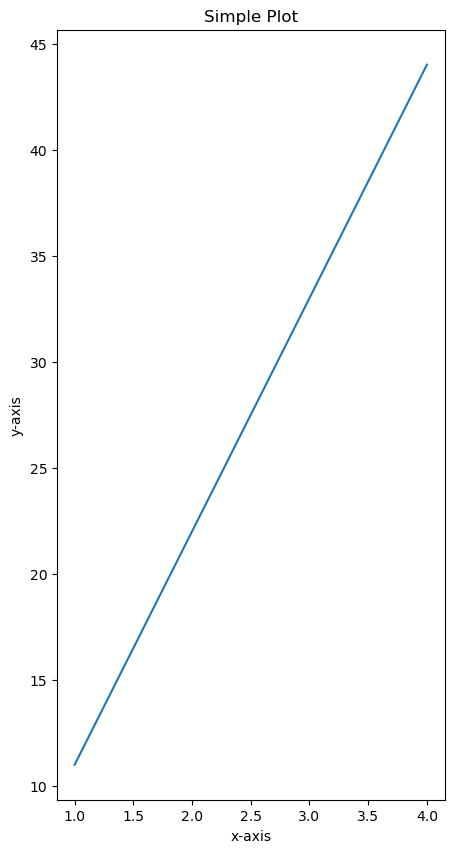

In [2]:
# 0. import matplotlib and get it ready for plotting in jupyter 
%matplotlib inline 
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1,2,3,4]
y = [11, 22, 33, 44]

# 2. Setup plot 
fig, ax = plt.subplots(figsize=(5, 10)) #(width, height)

# 3. Plot data 
ax.plot(x,y)

# 4. Customize plot 
ax.set(title="Simple Plot", 
       xlabel="x-axis",
       ylabel="y-axis")

# 5. Save & show (you save the whole figure) 
fig.savefig("matplotlib-images/sample-plot.png")


## Making figures with NumPy arrays 
We want: 
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [9]:
# Create some data 
x = np.linspace(0,10,100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

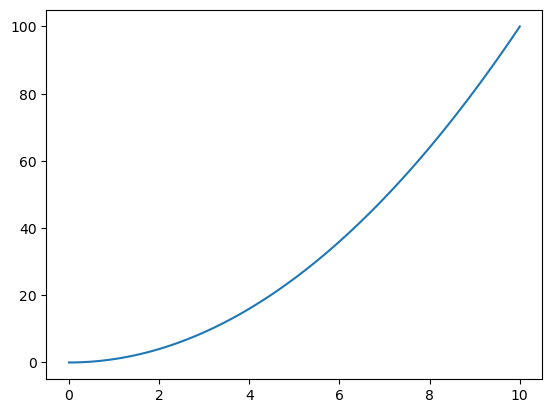

In [13]:
# Plot the data 
fig, ax = plt.subplots()
ax.plot(x, x**2); #Semi-colin to skip that line of code 

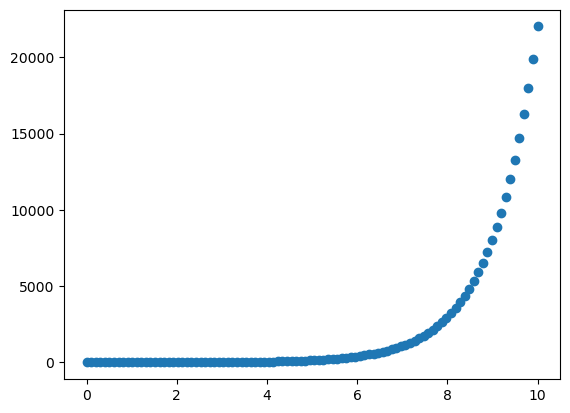

In [14]:
# Use the same data to make a scatter plot 
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x))


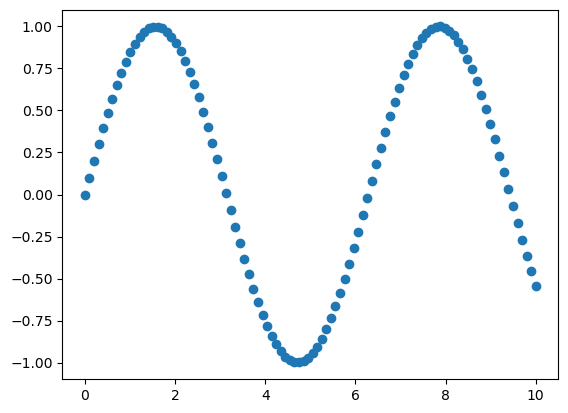

In [17]:
# Another scatterplot 
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

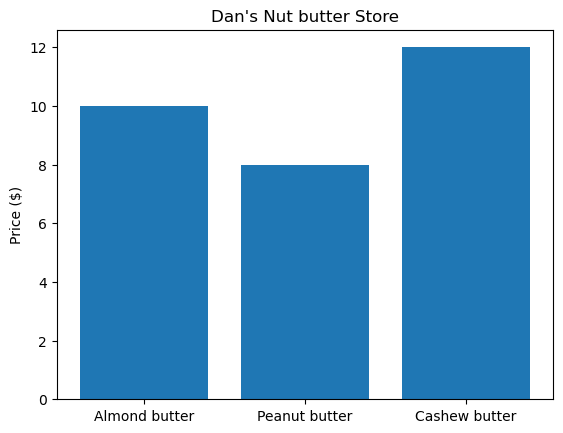

In [21]:
# Make a plot from dictionary 
nut_butter_prices = {"Almond butter": 10, 
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values() ) # x,y
ax.set(title="Dan's Nut butter Store", 
       ylabel="Price ($)");

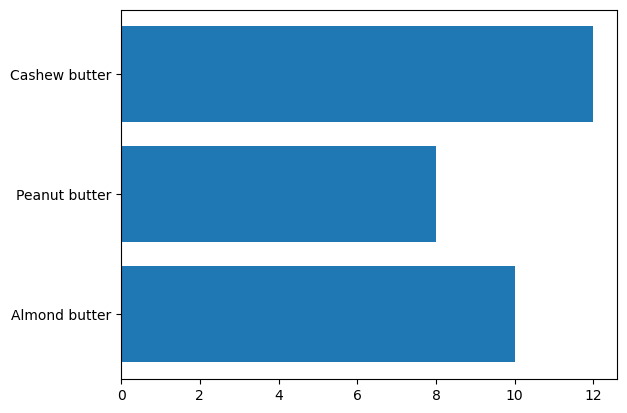

In [24]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values())); # Horizontal bar 

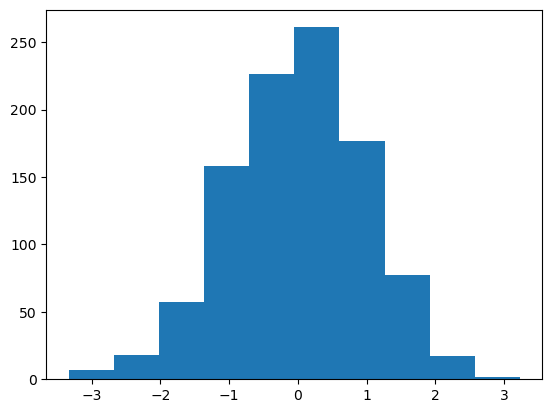

In [28]:
# Make some data for histograms and plot it 
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

# Two options for subplots 

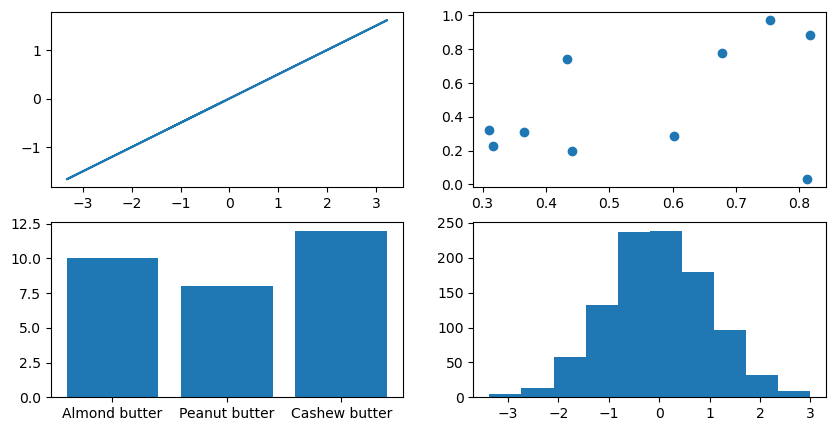

In [35]:
# Subplot option 1 - we will use this 
fig, ((ax1, ax2), (ax3, ax4))=plt.subplots(nrows=2,
                                            ncols=2,
                                            figsize=(10,5))

# Plot to each different axis 
ax1.plot(x, x/2); 
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

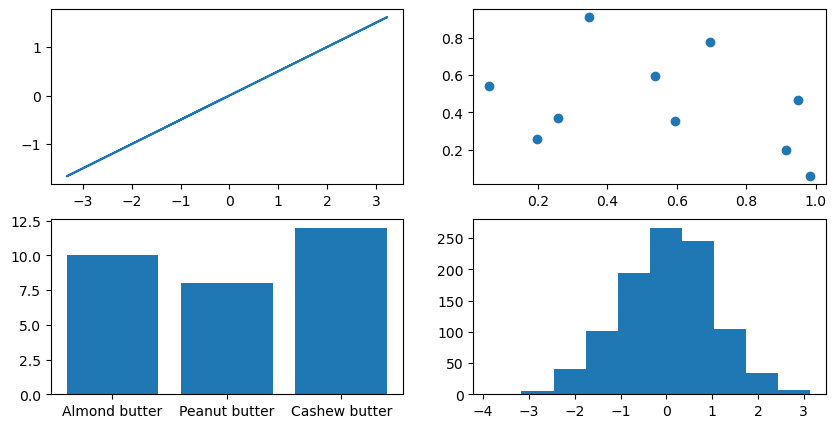

In [38]:
# Subplot option 2 fig
fix, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10,5))

# Plot to each different axis 
ax[0,0].plot(x, x/2);
ax[0,1].scatter(np.random.random(10), np.random.random(10));
ax[1,0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1,1].hist(np.random.randn(1000));

## Plotting from pandas DataFrames 

In [41]:
import pandas as pd 

In [156]:
# Make a dataframe 
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [47]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range("1/1/2024", periods=1000))
ts           

2024-01-01    0.381606
2024-01-02   -0.133597
2024-01-03    0.629486
2024-01-04    0.429635
2024-01-05    0.297232
                ...   
2026-09-22    1.121324
2026-09-23    0.054756
2026-09-24   -1.522241
2026-09-25   -1.414002
2026-09-26   -0.410109
Freq: D, Length: 1000, dtype: float64

<Axes: >

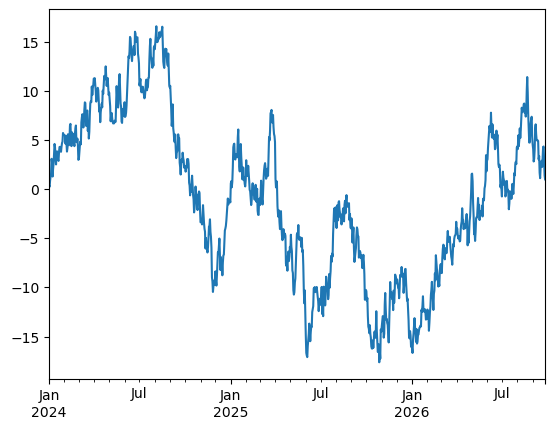

In [51]:
cs = ts.cumsum()
cs.plot()

In [52]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [152]:
car_sales["Price"] = car_sales["Price"].replace("[$,.]", "", regex=True)
car_sales

TypeError: cannot convert the series to <class 'int'>

In [155]:
# Remove last two zeros 
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,"
1,Honda,Red,87899,4,"$5,"
2,Toyota,Blue,32549,3,"$7,"
3,BMW,Black,11179,5,"$22,"
4,Nissan,White,213095,4,"$3,"
5,Toyota,Green,99213,4,"$4,"
6,Honda,Blue,45698,4,"$7,"
7,Honda,Blue,54738,4,"$7,"
8,Toyota,White,60000,4,"$6,"
9,Nissan,White,31600,4,"$9,"


In [69]:
car_sales["Sale Date"] = pd.date_range("1/1/2024", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2024-01-01
1,Honda,Red,87899,4,5000,2024-01-02
2,Toyota,Blue,32549,3,7000,2024-01-03
3,BMW,Black,11179,5,22000,2024-01-04
4,Nissan,White,213095,4,3500,2024-01-05
5,Toyota,Green,99213,4,4500,2024-01-06
6,Honda,Blue,45698,4,7500,2024-01-07
7,Honda,Blue,54738,4,7000,2024-01-08
8,Toyota,White,60000,4,6250,2024-01-09
9,Nissan,White,31600,4,9700,2024-01-10


In [71]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2024-01-01,4000
1,Honda,Red,87899,4,5000,2024-01-02,9000
2,Toyota,Blue,32549,3,7000,2024-01-03,16000
3,BMW,Black,11179,5,22000,2024-01-04,38000
4,Nissan,White,213095,4,3500,2024-01-05,41500
5,Toyota,Green,99213,4,4500,2024-01-06,46000
6,Honda,Blue,45698,4,7500,2024-01-07,53500
7,Honda,Blue,54738,4,7000,2024-01-08,60500
8,Toyota,White,60000,4,6250,2024-01-09,66750
9,Nissan,White,31600,4,9700,2024-01-10,76450


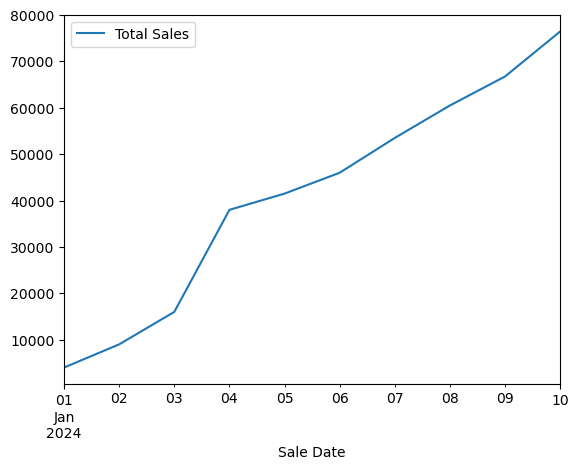

In [72]:
# Let's plot the total sales 
car_sales.plot(x="Sale Date", y="Total Sales");

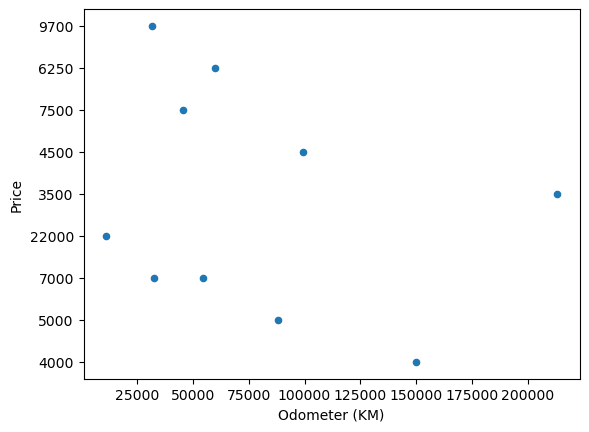

In [74]:
car_sales.plot(x="Odometer (KM)", y="Price",kind="scatter");

In [76]:
# How about a bar graph? 
x = np.random.rand(10, 4)
x

# Turn it into a dataframe 
df = pd.DataFrame(x, columns=['a','b','c','d'])
df

,a,b,c,d
0,0.533332,0.046781,0.976585,0.386775
1,0.837997,0.609546,0.337187,0.971307
2,0.115404,0.343262,0.898983,0.041219
3,0.863015,0.397116,0.056595,0.048856
4,0.932329,0.725089,0.439444,0.980494
5,0.419663,0.516398,0.505098,0.083183
6,0.369724,0.879483,0.918252,0.727196
7,0.444706,0.703748,0.640356,0.191923
8,0.038472,0.537827,0.255828,0.250413
9,0.493703,0.351445,0.723071,0.637984


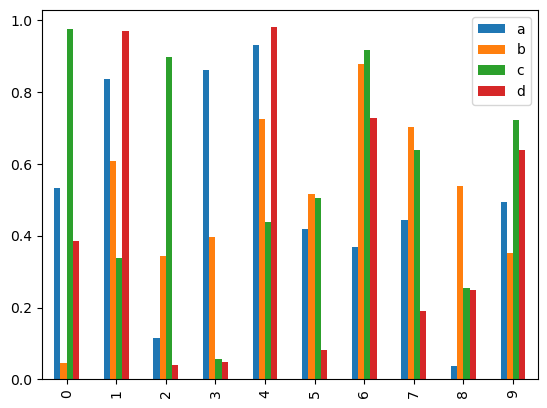

In [77]:
# Two different ways to plot: 
df.plot.bar();

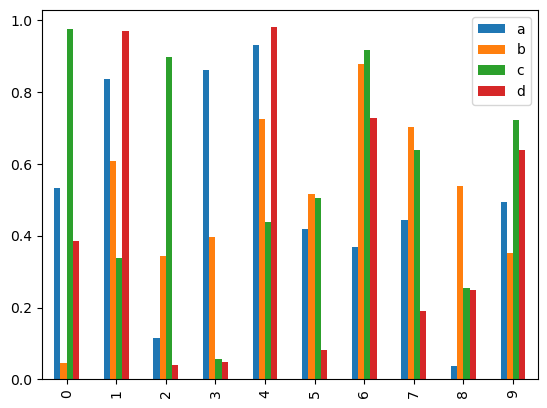

In [78]:
df.plot(kind="bar");

In [79]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2024-01-01,4000
1,Honda,Red,87899,4,5000,2024-01-02,9000
2,Toyota,Blue,32549,3,7000,2024-01-03,16000
3,BMW,Black,11179,5,22000,2024-01-04,38000
4,Nissan,White,213095,4,3500,2024-01-05,41500
5,Toyota,Green,99213,4,4500,2024-01-06,46000
6,Honda,Blue,45698,4,7500,2024-01-07,53500
7,Honda,Blue,54738,4,7000,2024-01-08,60500
8,Toyota,White,60000,4,6250,2024-01-09,66750
9,Nissan,White,31600,4,9700,2024-01-10,76450


<Axes: xlabel='Make'>

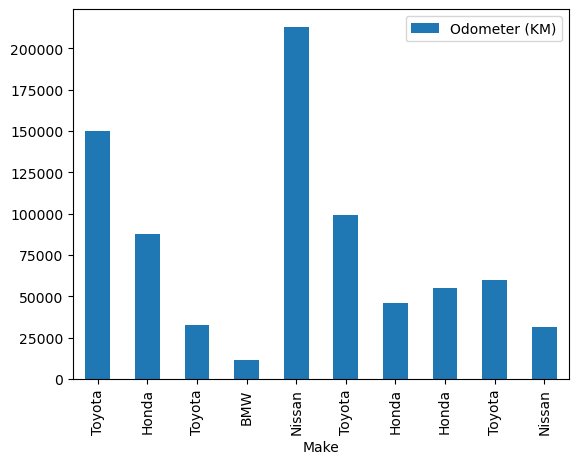

In [80]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar")

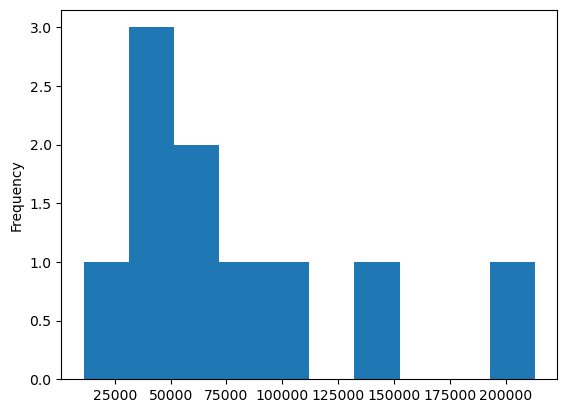

In [85]:
# How about histograms? 
car_sales["Odometer (KM)"].plot.hist();

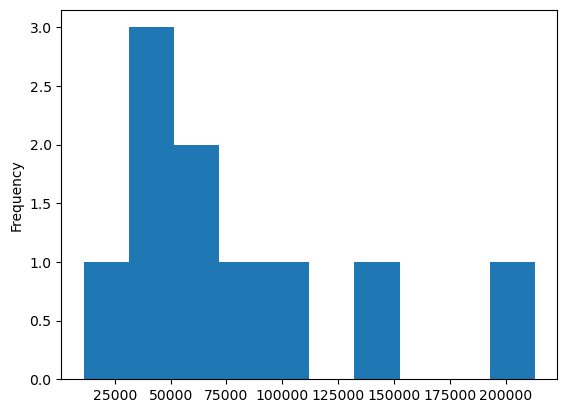

In [83]:
car_sales["Odometer (KM)"].plot(kind="hist");

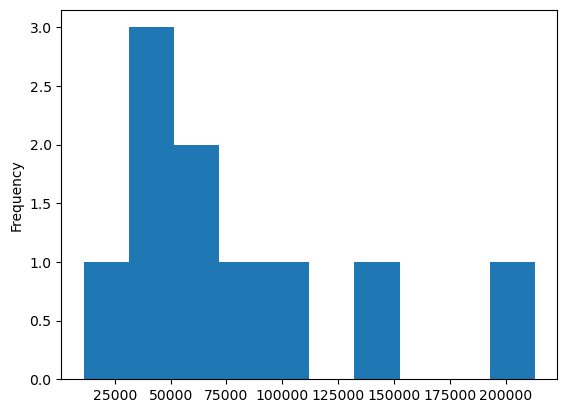

In [88]:
car_sales["Odometer (KM)"].plot.hist(bins=10 );

In [91]:
# Let's try on another dataset 
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


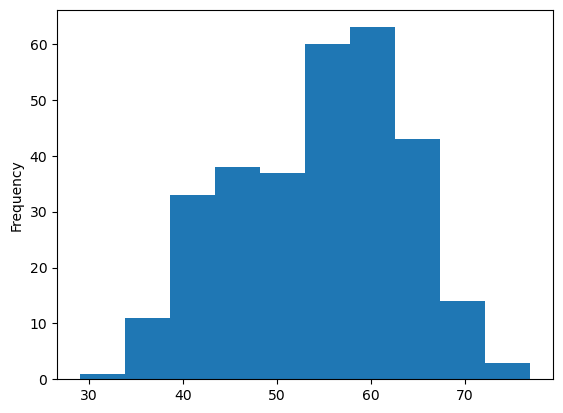

In [97]:
# Create a histogram of age 
heart_disease["age"].plot.hist(bins=10);

In [98]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


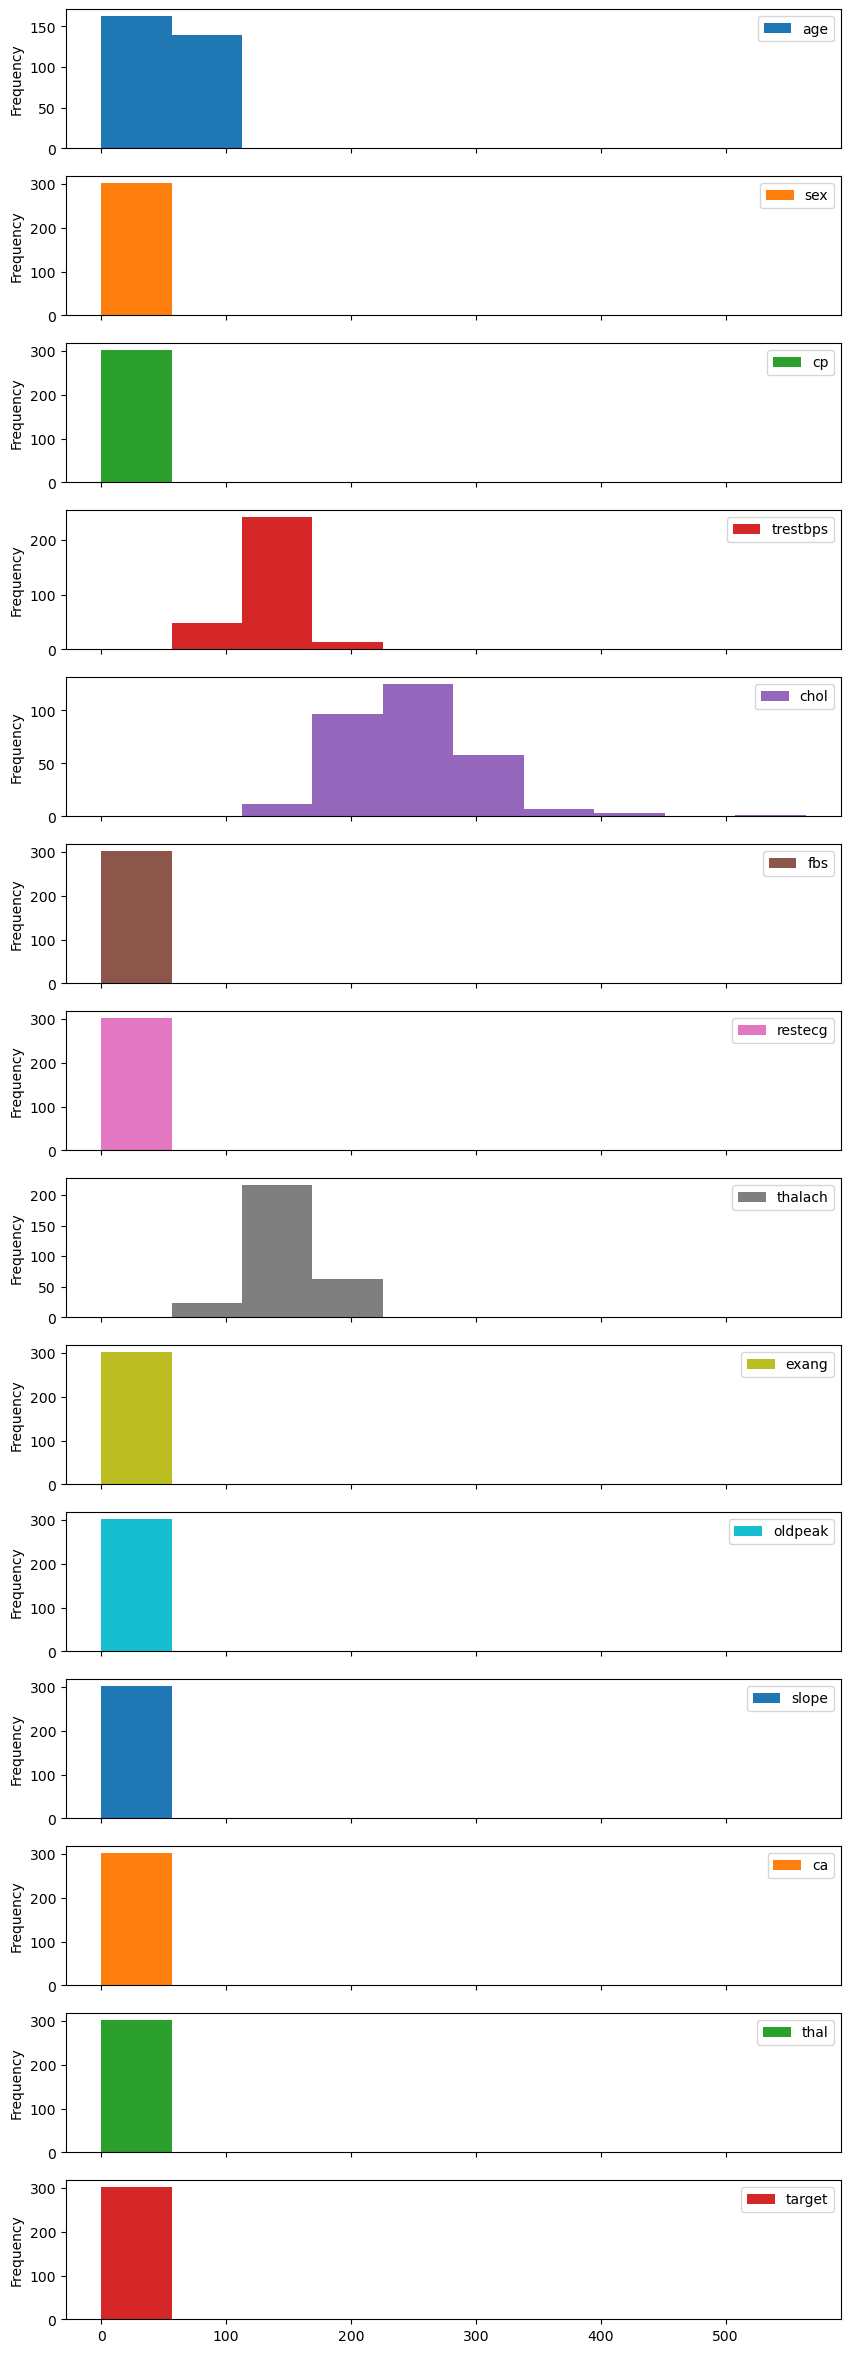

In [100]:
heart_disease.plot.hist(figsize=(10,30),subplots=True);

### Which one should you use? (pyplot vs matplotlib OO method?)

* When plotting something quickly, ok to use the pyplot method 
* When plotting something more advanced, use the OO method 

In [109]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


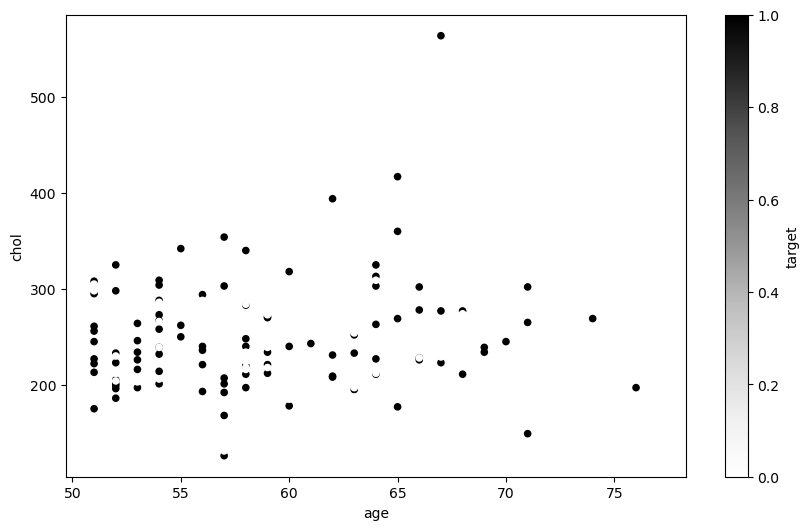

In [114]:
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c='target',
            figsize=(10,6)
            );


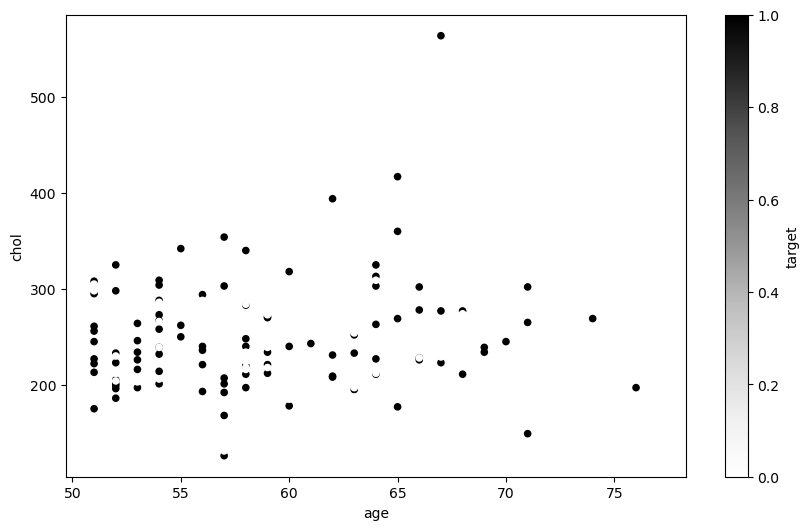

In [117]:
# OO Method - halfway 
fix,ax = plt.subplots(figsize=(10,6))
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target',
            ax=ax);

#ax.set_xlim([45,100])

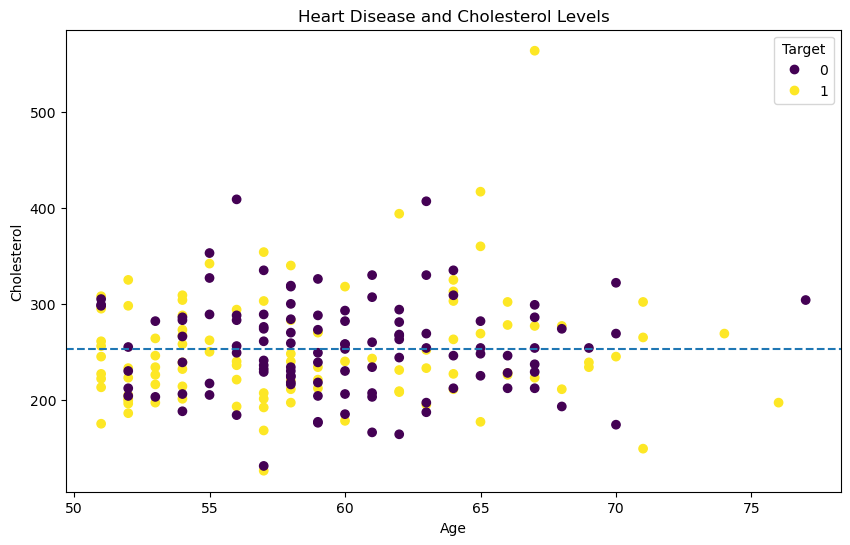

In [125]:
## OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data 
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"])

# Customize 
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target"); # find legend elemnts from c parameter 

# Add a horizontal line 
ax.axhline(over_50["chol"].mean(),
          linestyle='--');

In [126]:
over_50.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


Text(0.5, 0.98, 'Heart Disease Analysis')

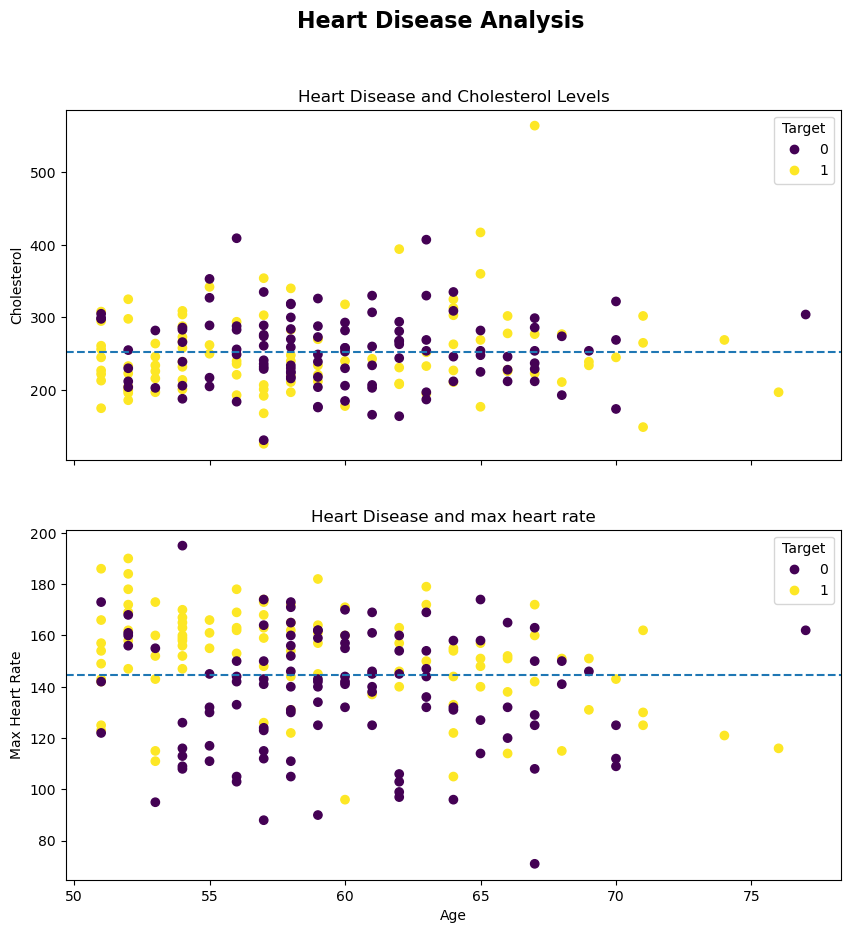

In [144]:
# Subplot of chol, age, thalach (max heart rate) 
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1, 
                               figsize=(10,10),
                              sharex=True)
# sharex - share x labels between both and remove label from one of the chart  
# Add data to ax0 
scatter = ax0.scatter(x=over_50["age"],
                        y=over_50["chol"],
                      c=over_50["target"])

# Customize ax0 
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")
#Add a meanline 
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");

# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and max heart rate",
        xlabel="Age",
        ylabel="Max Heart Rate");
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a meanline 
ax1.axhline(y=over_50["thalach"].mean(),
            linestyle="--");

# Add a title to the figure 
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold")

## Customizing Matplotlib plots and getting stylish 

In [145]:
# See available styles 
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

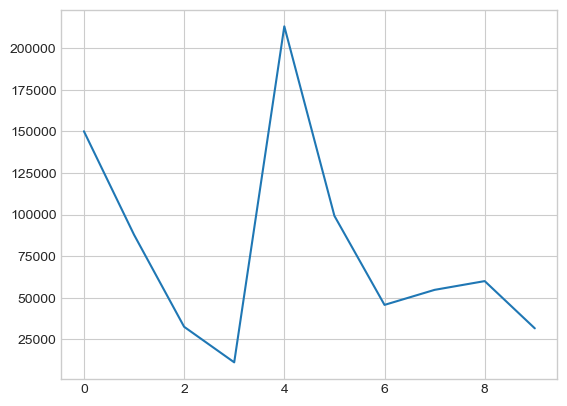

In [161]:

car_sales["Odometer (KM)"].plot();

In [158]:
plt.style.use('seaborn-v0_8-whitegrid')

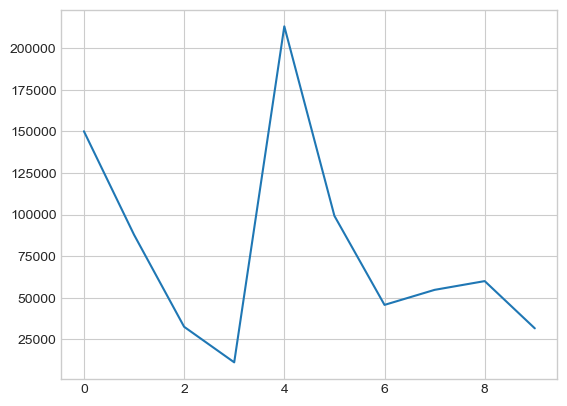

In [160]:
car_sales["Odometer (KM)"].plot();

In [163]:
plt.style.use('seaborn-v0_8')

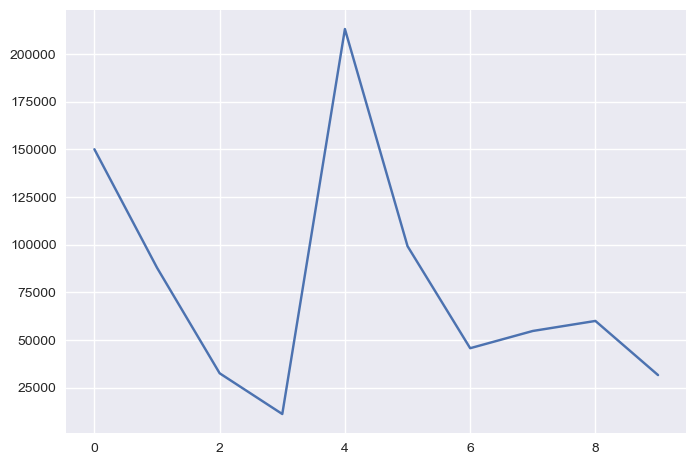

In [164]:
car_sales["Odometer (KM)"].plot();

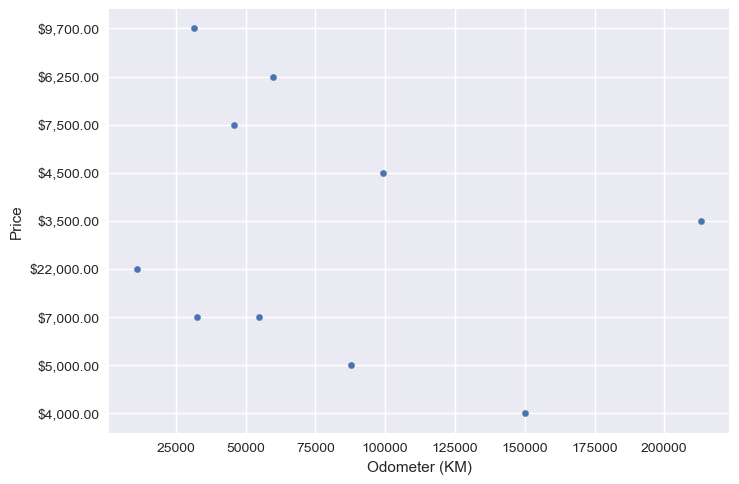

In [166]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

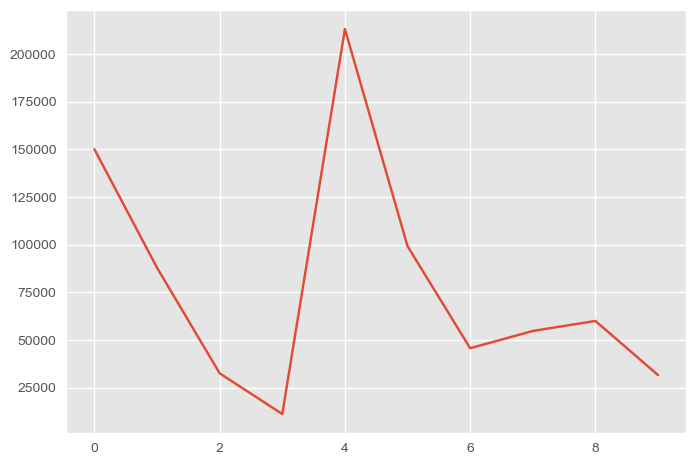

In [167]:
plt.style.use('ggplot')
car_sales["Odometer (KM)"].plot();

In [168]:
# Create some data 
x= np.random.randn(10,4)
x

array([[ 0.43957593,  1.78545402,  2.48585627, -0.86903795],
       [ 0.20450352,  0.59787929, -1.7669518 , -0.98024754],
       [ 0.68969576, -0.00735634,  0.37217346, -1.09688202],
       [ 0.72894686,  0.23532144,  1.07559276, -0.82224995],
       [ 0.99826666, -0.21737204, -0.7548307 ,  1.16122298],
       [ 0.77041339, -0.81753546,  0.92638461, -0.44661877],
       [-0.75350169, -0.02192627, -0.42242994, -0.41646993],
       [-0.16307311, -0.760729  ,  0.33755855,  0.46877068],
       [-1.29384306, -0.72015576,  0.9720544 , -0.33088346],
       [-1.25744103, -1.77957218, -0.25971705,  1.61375426]])

In [171]:
df = pd.DataFrame(x, columns=['a','b','c','d'])
df

,a,b,c,d
0,0.439576,1.785454,2.485856,-0.869038
1,0.204504,0.597879,-1.766952,-0.980248
2,0.689696,-0.007356,0.372173,-1.096882
3,0.728947,0.235321,1.075593,-0.822250
4,0.998267,-0.217372,-0.754831,1.161223
5,0.770413,-0.817535,0.926385,-0.446619
6,-0.753502,-0.021926,-0.422430,-0.416470
7,-0.163073,-0.760729,0.337559,0.468771
8,-1.293843,-0.720156,0.972054,-0.330883
9,-1.257441,-1.779572,-0.259717,1.613754


matplotlib.axes._axes.Axes

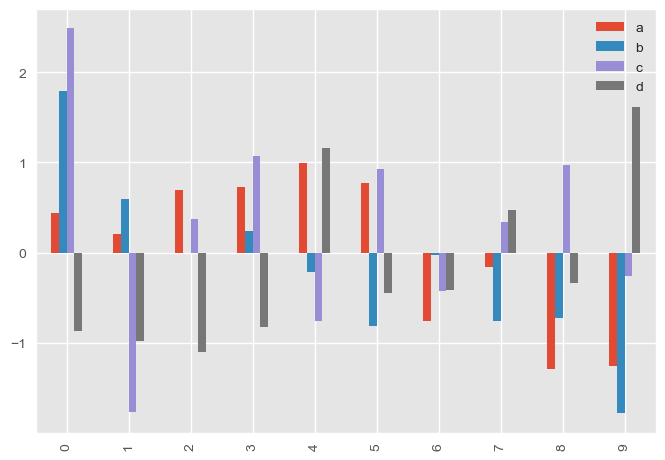

In [173]:
ax=df.plot(kind='bar')
type(ax)

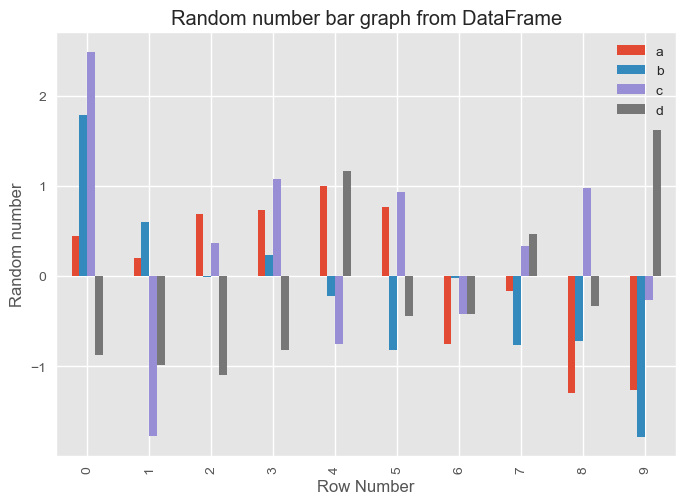

In [175]:
# Customize our plot with the set() method 
ax= df.plot(kind="bar")
# Add some labels and a title 
ax.set(title="Random number bar graph from DataFrame",
       xlabel="Row Number",
       ylabel="Random number")
# Make the legend visible 
ax.legend().set_visible(True)

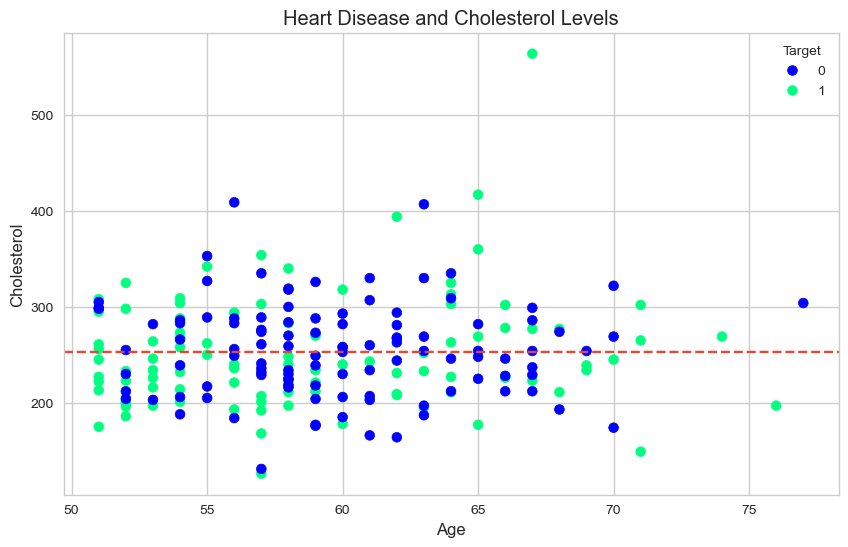

In [184]:
# COLORS: https://matplotlib.org/stable/tutorials/index.html

# Set the style 
plt.style.use('seaborn-v0_8-whitegrid')

## OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data 
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                    cmap="winter") # This changes the color scheme 

# Customize 
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target"); # find legend elemnts from c parameter 

# Add a horizontal line 
ax.axhline(over_50["chol"].mean(),
          linestyle='--');

Text(0.5, 0.98, 'Heart Disease Analysis')

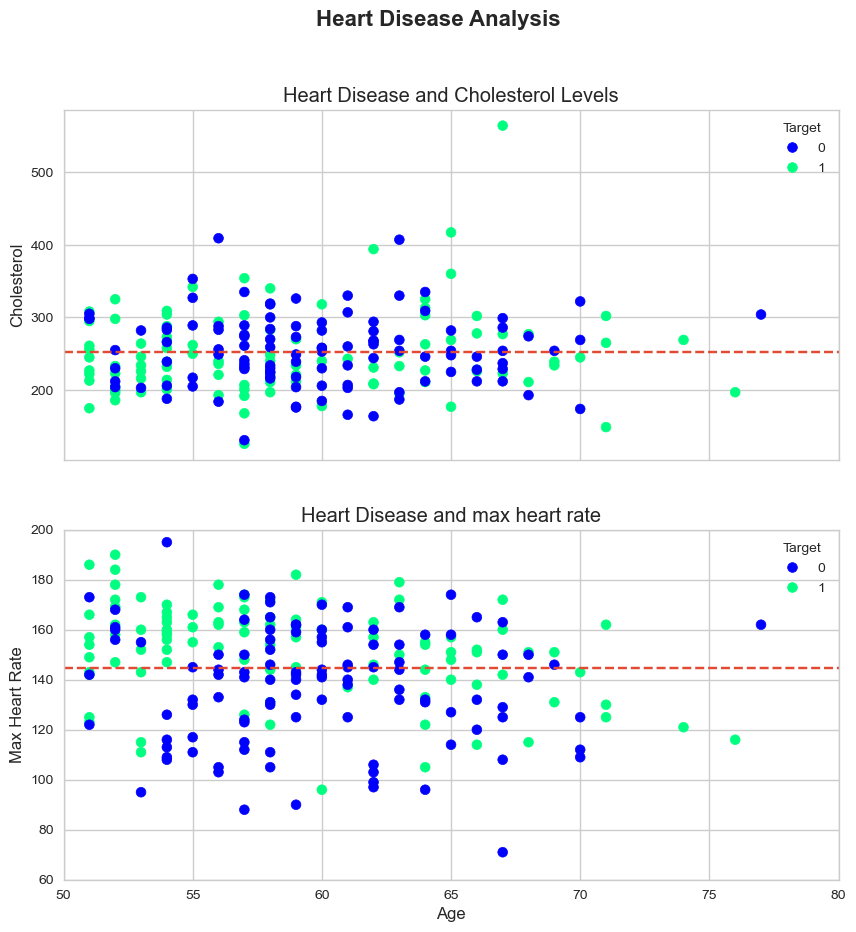

In [195]:
# Customizing the x and y axis limitations 

# Subplot of chol, age, thalach (max heart rate) 
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1, 
                               figsize=(10,10),
                              sharex=True)
# sharex - share x labels between both and remove label from one of the chart  
# Add data to ax0 
scatter = ax0.scatter(x=over_50["age"],
                        y=over_50["chol"],
                      c=over_50["target"],
                     cmap="winter")

# Customize ax0 
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")
# Change the x and y axis limits: 
ax0.set_xlim([50,80])


# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")
#Add a meanline 
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");

# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"],
                     cmap="winter")

# Customize ax1
ax1.set(title="Heart Disease and max heart rate",
        xlabel="Age",
        ylabel="Max Heart Rate");
ax1.legend(*scatter.legend_elements(), title="Target")
ax1.set_xlim([50,80])
ax1.set_ylim([60,200])
# Add a meanline 
ax1.axhline(y=over_50["thalach"].mean(),
            linestyle="--");

# Add a title to the figure 
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold")


In [196]:
fig.savefig("heart-disease-analysis-plot-saved-with-code.png")